In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

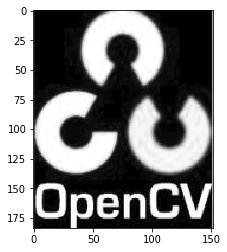

In [2]:
img = cv2.imread('opencv.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(gray)
plt.imshow(v, 'gray')
plt.show()

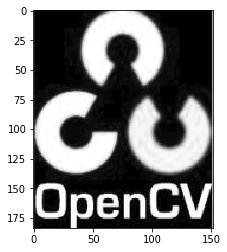

In [3]:
# remove noise by using Gaussian
blur = cv2.GaussianBlur(v,(3,3),0)
plt.imshow(v, 'gray')
plt.show()

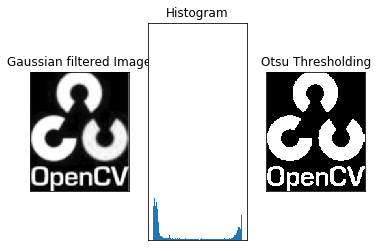

True

In [4]:
# Otsu thresholding
ret,th = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.subplot(1,3,1), plt.imshow(blur, 'gray')
plt.title('Gaussian filtered Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2), plt.hist(blur.ravel(), 256)
plt.title('Histogram'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(th,'gray')
plt.title('Otsu Thresholding'), plt.xticks([]), plt.yticks([])
plt.show()

cv2.imwrite('otsuThesholding.jpg', th)

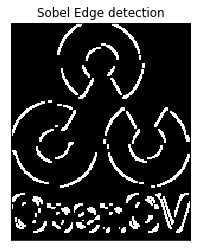

True

In [18]:
# Sobel Edge detecions
sobel = cv2.Sobel(th,cv2.CV_8UC1,1,1,ksize=5)

plt.subplot(1,1,1),plt.imshow(sobel,cmap = 'gray')
plt.title('Sobel Edge detection'), plt.xticks([]), plt.yticks([])
plt.show()

cv2.imwrite('sobel.jpg',sobel)

In [19]:
sobel.shape

(184, 152)

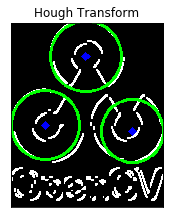

True

In [33]:
gray_img = cv2.imread('sobel.jpg', 0)
cimg = cv2.cvtColor(sobel,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(gray_img,cv2.HOUGH_GRADIENT,1,20,
                            param1=45,param2=32,minRadius=0,maxRadius=0)

circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

plt.subplot(122),plt.imshow(cimg)
plt.title('Hough Transform'), plt.xticks([]), plt.yticks([])
plt.show()

cv2.imwrite('houghCircle.jpg', cimg)

In [12]:
# number of objects
objects = circles.shape[1]
print(objects)

3
